In [2]:
import pandas as pd

df = pd.read_csv("C:\\Users\\Aspire 7\\Downloads\\heart-disease-dataset.csv")
print(df.shape)
print(df.head())


(1190, 12)
    age  sex  chest_pain_type  resting_bp_s  cholesterol  fasting_blood_sugar  \
0  40.0  1.0              2.0         140.0        289.0                  0.0   
1  49.0  0.0              3.0         160.0        180.0                  0.0   
2  37.0  1.0              2.0         130.0        283.0                  0.0   
3  48.0  0.0              4.0         138.0        214.0                  0.0   
4  54.0  1.0              3.0         150.0        195.0                  0.0   

   resting_ecg  max_heart_rate  exercise_angina  oldpeak  st_slope  target  
0          0.0           172.0              0.0      0.0       1.0     0.0  
1          0.0           156.0              0.0      1.0       2.0     1.0  
2          1.0            98.0              0.0      0.0       1.0     0.0  
3          0.0           108.0              1.0      1.5       2.0     1.0  
4          0.0           122.0              0.0      0.0       1.0     0.0  


In [3]:
df.isna().sum()


age                    0
sex                    0
chest_pain_type        0
resting_bp_s           0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
st_slope               0
target                 0
dtype: int64

In [4]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [5]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [12]:
X = df.drop(columns=['target'])
y = df['target']


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_std = scaler.fit_transform(X)


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled_mm = scaler.fit_transform(X)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Standard
X_train, X_test, y_train, y_test = train_test_split(X_scaled_std, y, test_size=0.2)
clf = RandomForestClassifier().fit(X_train, y_train)
print("StandardScaler accuracy:", accuracy_score(y_test, clf.predict(X_test)))

# MinMax
X_train, X_test, y_train, y_test = train_test_split(X_scaled_mm, y, test_size=0.2)
clf = RandomForestClassifier().fit(X_train, y_train)
print("MinMaxScaler accuracy:", accuracy_score(y_test, clf.predict(X_test)))


StandardScaler accuracy: 0.9201680672268907
MinMaxScaler accuracy: 0.9243697478991597


In [15]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [17]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True),
    "Gradient Boosting": GradientBoostingClassifier()
}


In [18]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    }


In [19]:
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    metrics = evaluate_model(model, X_test, y_test)

    metrics["Model"] = model_name
    results.append(metrics)


In [20]:
results_df = pd.DataFrame(results)
results_df = results_df.set_index("Model")
print(results_df)


                     Accuracy  Precision    Recall  F1 Score   ROC-AUC
Model                                                                 
Logistic Regression  0.840336   0.843750  0.857143  0.850394  0.905187
Random Forest        0.928571   0.929134  0.936508  0.932806  0.973108
SVM                  0.735294   0.760331  0.730159  0.744939  0.811189
Gradient Boosting    0.903361   0.905512  0.912698  0.909091  0.949476


In [21]:
best_model_name = results_df["ROC-AUC"].idxmax()
print("Best Model:", best_model_name)


Best Model: Random Forest


In [23]:
import joblib
import os


os.makedirs("models", exist_ok=True)
best_model = models[best_model_name]
joblib.dump(best_model, "models/best_model.pkl")


['models/best_model.pkl']

In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    best_model,
    X,
    y,
    cv=5,
    scoring="roc_auc"
)

print("Mean ROC-AUC:", scores.mean())


Mean ROC-AUC: 0.965370331406899


In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, None],
                         'n_estimators': [50, 100, 150]})

In [27]:
import shap
import matplotlib.pyplot as plt



In [29]:
explainer = shap.TreeExplainer(best_model)


In [30]:
shap_values = explainer.shap_values(X_test)


In [31]:
shap_values_class1 = shap_values[1]


In [34]:
print(shap_values_class1.shape)
print(X_test.shape)

(11, 2)
(238, 11)


In [46]:
def safe_summary_plot(shap_values, X, feature_names=None, plot_type="dot"):
    # Handle multi-class case
    if isinstance(shap_values, list):
        shap_values = shap_values[1]  # default to class 1
    
    # Drop offset column if present
    if shap_values.shape[1] == X.shape[1] + 1:
        shap_values = shap_values[:, :-1]
    
    shap.summary_plot(
        shap_values,
        X,
        feature_names=list(feature_names) if feature_names is not None else list(X.columns),
        plot_type=plot_type
    )

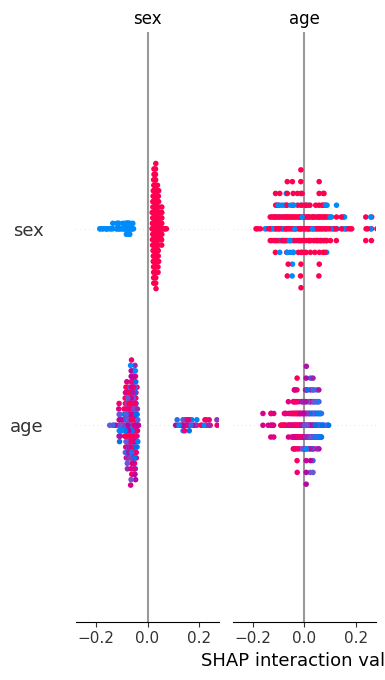

In [47]:
safe_summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="bar")

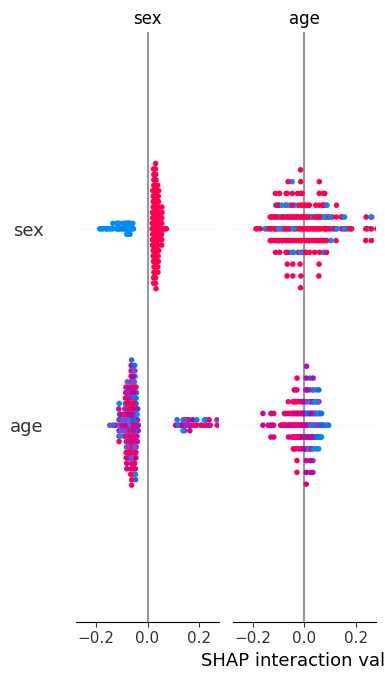

In [ ]:
import os

os.makedirs("images", exist_ok=True)
plt.savefig("images/shap_summary.png", dpi=300, bbox_inches="tight")
plt.close()

import matplotlib.pyplot as plt
import shap

# Your SHAP plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# Save the figure
plt.savefig("images/shap_summary.png", dpi=300, bbox_inches="tight")
plt.close()

In [ ]:

os.makedirs("images", exist_ok=True)
plt.savefig("images/shap_summary.png", dpi=300, bbox_inches="tight")
plt.close()

import matplotlib.pyplot as plt
import shap

# Your SHAP plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# Save the figure
plt.savefig("images/shap_summary.png", dpi=300, bbox_inches="tight")
plt.close()

In [43]:
def safe_summary_plot(shap_values, X, feature_names=None, plot_type="dot"):
    if shap_values.shape[1] == X.shape[1] + 1:
        shap_values = shap_values[:, :-1]
    if feature_names is None:
        feature_names = list(X.columns)
    else:
        feature_names = list(feature_names)
    shap.summary_plot(shap_values, X, feature_names=feature_names, plot_type=plot_type)

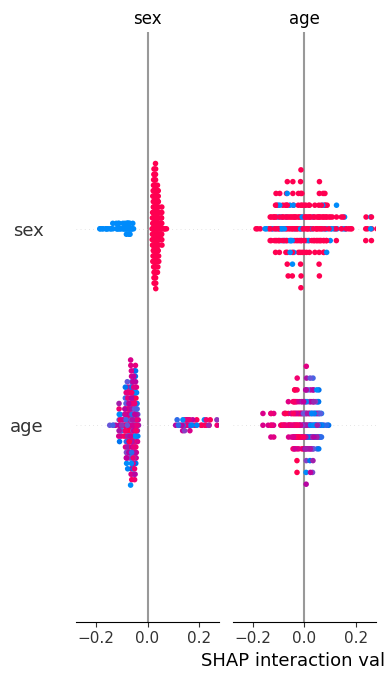

In [44]:
safe_summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="bar")

In [49]:
from sklearn.inspection import permutation_importance


In [50]:
result = permutation_importance(
    best_model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    scoring="roc_auc"
)


In [51]:
import pandas as pd

perm_importance = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": result.importances_mean
}).sort_values(by="Importance", ascending=False)


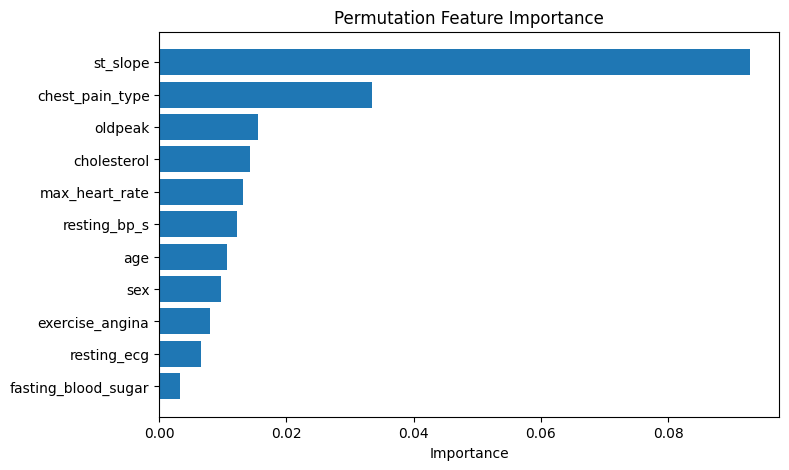

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(perm_importance["Feature"], perm_importance["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Permutation Feature Importance")
plt.show()
